In [2]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot

In [3]:
class four_room():

	def __init__(self):
		self.nS = 20
		nS = self.nS
		self.nA = 4

		self.map = [[-1, -1, -1, -1, -1, -1, -1],
					[-1,  0,  1,  2,  3,  4, -1],
					[-1,  5,  6, -1,  7,  8, -1],
					[-1,  9, -1, -1, 10, -1, -1],
					[-1, 11, 12, 13, 14, 15, -1],
					[-1, 16, 17, -1, 18, 19, -1],
					[-1, -1, -1, -1, -1, -1, -1]]
		map = np.array(self.map)

		# We build the transitions matrix P using the map.
		self.P = np.zeros((nS, 4, nS))
		for s in range(nS):
			temp = np.where(s == map)
			x, y = temp[0][0], temp[1][0]
			up = map[x-1, y]
			right = map[x, y+1]
			down = map[x+1, y]
			left = map[x, y-1]

			# Action 0: go up.
			a = 0
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, up] += 0.7
			# Right
			if right == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, right] += 0.1
			# Left
			if left == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, left] += 0.1
			
			# Action 1: go right.
			a = 1
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, up] += 0.1
			# Right
			if right == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, right] += 0.7
			# Down
			if down == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, down] += 0.1
			
			# Action 2: go down.
			a = 2
			self.P[s, a, s] += 0.1
			# Right
			if right == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, right] += 0.1
			# Down
			if down == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, down] += 0.7
			# Left
			if left == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, left] += 0.1

			# Action 3: go left.
			a = 3
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, up] += 0.1
			# Down
			if down == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, down] += 0.1
			# Left
			if left == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, left] += 0.7
			
			# Set to teleport back when in the rewarding state.
			if s == self.nS - 1:
				for a in range(4):
					for ss in range(self.nS):
						self.P[s, a, ss] = 0
						if ss == 0:
							self.P[s, a, ss] = 1

			
		# We build the reward matrix R.
		self.R = np.zeros((nS, 4))
		for a in range(4):
			self.R[nS - 1, a] = 1

		# We (arbitrarily) set the initial state in the top-left corner.
		self.s = 0

	# To reset the environment in initial settings.
	def reset(self):
		self.s = 0
		return self.s

	# Perform a step in the environment for a given action. Return a couple state, reward (s_t, r_t).
	def step(self, action):
		new_s = np.random.choice(np.arange(self.nS), p=self.P[self.s, action])
		reward = self.R[self.s, action]
		self.s = new_s
		return new_s, reward

In [4]:
env = four_room()

In [5]:
def exp_rew(env, s, a, V):
    x = env.R[s, a] + np.sum([env.P[s, a, s_] * V[s_] for s_ in range(env.nS)])
    return x

In [6]:
def pi(V, env):
    pi = np.zeros(env.nS,dtype = int)
    for s in range(env.nS):
        pi[s] = np.argmax([exp_rew(env, s, a, V) for a in range(env.nA)])
    return pi

In [7]:
def convergence(f):
    return np.max(f) - np.min(f)

In [16]:
def VI_ar(env, epsilon=10 ** -6):

    # Initialization
    V0 = np.zeros(env.nS)
    V1 = np.zeros(env.nS)
    n_iter = 0

    while True:
        n_iter += 1
        V0 = V1.copy()
        for s in range(env.nS):
            V1[s] = np.max([exp_rew(env, s, a, V0) for a in range(env.nA)])

        if convergence(V1 - V0) < epsilon:
            break

    V = V1
    policy = pi(V, env)
    g = (np.max(V1 - V0) + np.min(V1 - V0)) / 2
    b = V - np.min(V)

    return V, policy, g, b

In [27]:
V, policy, gain, bias= VI_ar(env)
V, policy, gain, bias

(array([11.06132241, 11.15585494, 11.27739645, 11.38543287, 11.30271762,
        11.15585494, 11.06132241, 11.5207192 , 11.39893747, 11.27739645,
        11.64615254, 11.38543287, 11.5207192 , 11.64615254, 11.75418877,
        11.8622254 , 11.30271762, 11.39893747, 11.8622254 , 11.9856963 ]),
 array([1, 1, 1, 2, 2, 2, 0, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0]),
 0.0756256205775161,
 array([0.00000000e+00, 9.45325245e-02, 2.16074040e-01, 3.24110455e-01,
        2.41395207e-01, 9.45325245e-02, 1.77635684e-15, 4.59396786e-01,
        3.37615056e-01, 2.16074040e-01, 5.84830132e-01, 3.24110455e-01,
        4.59396786e-01, 5.84830132e-01, 6.92866356e-01, 8.00902991e-01,
        2.41395207e-01, 3.37615056e-01, 8.00902991e-01, 9.24373887e-01]))

In [28]:
span_bias = convergence(bias)
span_bias

0.9243738874162108

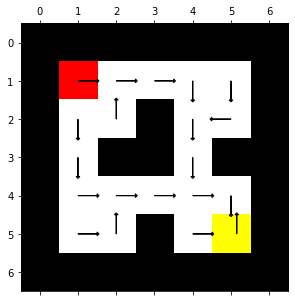

In [11]:
map = (env.map == -np.ones_like(env.map)).astype(int)
map[1, 1] = 2
map[-2, -2] = 3
plt.pyplot.matshow(map, cmap=plt.colors.ListedColormap(["white", "black", "red", "yellow"]))
N = 0
for i in range(map.shape[0] - 2):
    for j in range(map.shape[0] - 2):
        x = j
        y = i
        if not map[i + 1, j + 1] == 1:
            ox = 0
            oy = 0
            dir = [
                (0 + ox, -1 + oy),
                (1 + ox, 0 + oy),
                (0 + ox, 1 + oy),
                (-1 + ox, 0 + oy),
            ][policy[N]]

            plt.pyplot.arrow(
                1 + x + (0.15 if i == j == map.shape[0] - 3 else 0),
                1 + y,
                dir[0] / 2,
                dir[1] / 2,
                head_width=0.1,
                head_length=0.05
            )
            N += 1
# plt.colorbar()
plt.pyplot.show()

Random Teleport

In [19]:
class four_room_random():

	def __init__(self):
		self.nS = 20
		nS = self.nS
		self.nA = 4

		self.map = [[-1, -1, -1, -1, -1, -1, -1],
					[-1,  0,  1,  2,  3,  4, -1],
					[-1,  5,  6, -1,  7,  8, -1],
					[-1,  9, -1, -1, 10, -1, -1],
					[-1, 11, 12, 13, 14, 15, -1],
					[-1, 16, 17, -1, 18, 19, -1],
					[-1, -1, -1, -1, -1, -1, -1]]
		map = np.array(self.map)

		# We build the transitions matrix P using the map.
		self.P = np.zeros((nS, 4, nS))
		for s in range(nS):
			temp = np.where(s == map)
			x, y = temp[0][0], temp[1][0]
			up = map[x-1, y]
			right = map[x, y+1]
			down = map[x+1, y]
			left = map[x, y-1]

			# Action 0: go up.
			a = 0
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, up] += 0.7
			# Right
			if right == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, right] += 0.1
			# Left
			if left == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, left] += 0.1
			
			# Action 1: go right.
			a = 1
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, up] += 0.1
			# Right
			if right == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, right] += 0.7
			# Down
			if down == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, down] += 0.1
			
			# Action 2: go down.
			a = 2
			self.P[s, a, s] += 0.1
			# Right
			if right == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, right] += 0.1
			# Down
			if down == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, down] += 0.7
			# Left
			if left == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, left] += 0.1

			# Action 3: go left.
			a = 3
			self.P[s, a, s] += 0.1
			# Up
			if up == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, up] += 0.1
			# Down
			if down == -1:
				self.P[s, a, s] += 0.1
			else:
				self.P[s, a, down] += 0.1
			# Left
			if left == -1:
				self.P[s, a, s] += 0.7
			else:
				self.P[s, a, left] += 0.7
			
			# Set to teleport back when in the rewarding state
			prob = 1/(self.nS - 1)
			if s == self.nS - 1:
				for a in range(4):
					for ss in range(self.nS):
						self.P[s, a, ss] = 0
						if ss != s:
							self.P[s, a, ss] = prob

			
		# We build the reward matrix R.
		self.R = np.zeros((nS, 4))
		for a in range(4):
			self.R[nS - 1, a] = 1

		# We (arbitrarily) set the initial state in the top-left corner.
		self.s = 0

	# To reset the environment in initial settings.
	def reset(self):
		self.s = 0
		return self.s

	# Perform a step in the environment for a given action. Return a couple state, reward (s_t, r_t).
	def step(self, action):
		new_s = np.random.choice(np.arange(self.nS), p=self.P[self.s, action])
		reward = self.R[self.s, action]
		self.s = new_s
		return new_s, reward

In [20]:
env_ran = four_room_random()

In [21]:
V, policy, gain, bias= VI_ar(env_ran)
V, policy, gain, bias

(array([5.00886987, 5.15621899, 5.34566785, 5.51406722, 5.38513633,
        5.15621899, 5.00886987, 5.7249428 , 5.53511708, 5.34566785,
        5.92046093, 5.51406722, 5.7249428 , 5.92046093, 6.08886098,
        6.25726077, 5.38513633, 5.53511708, 6.25726077, 6.44971743]),
 array([1, 1, 1, 2, 2, 2, 0, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0]),
 0.11787970699374473,
 array([0.        , 0.14734912, 0.33679799, 0.50519735, 0.37626646,
        0.14734912, 0.        , 0.71607294, 0.52624721, 0.33679799,
        0.91159106, 0.50519735, 0.71607294, 0.91159106, 1.07999111,
        1.2483909 , 0.37626646, 0.52624721, 1.2483909 , 1.44084756]))

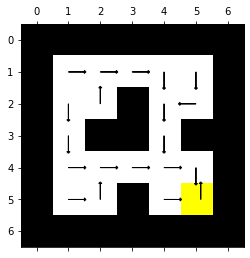

In [25]:
map = (env.map == -np.ones_like(env.map)).astype(int)
map[-2, -2] = 3
plt.pyplot.matshow(map, cmap=plt.colors.ListedColormap(["white", "black", "yellow"]))
N = 0
for i in range(map.shape[0] - 2):
    for j in range(map.shape[0] - 2):
        x = j
        y = i
        if not map[i + 1, j + 1] == 1:
            ox = 0
            oy = 0
            dir = [
                (0 + ox, -1 + oy),
                (1 + ox, 0 + oy),
                (0 + ox, 1 + oy),
                (-1 + ox, 0 + oy),
            ][policy[N]]

            plt.pyplot.arrow(
                1 + x + (0.15 if i == j == map.shape[0] - 3 else 0),
                1 + y,
                dir[0] / 2,
                dir[1] / 2,
                head_width=0.1,
                head_length=0.05
            )
            N += 1
# plt.colorbar()
plt.pyplot.show()